<a href="https://colab.research.google.com/github/Mastermind305/TOMATO-LEAF-DISEASE-CLASSIFICATION-BY-DEEP-LEARNING/blob/main/Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install unrar

In [ ]:
!unrar x '/content/drive/MyDrive/tomato/train.rar'
!unrar x '/content/drive/MyDrive/tomato/val.rar'

Streaming output truncated to the last 5000 lines.
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/1001f133-ff3e-48de-b288-5a3802d9f3e1___Com.G_SpM_FL 8621.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/1030a8ae-d4f2-4a36-aac9-c5ca40e5ec03___Com.G_SpM_FL 9295.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/105833d3-690a-44fa-abd7-0a8c6245f7b0___Com.G_SpM_FL 1277.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/10742761-050e-4a3b-b3ef-cbbde8cd6d2a___Com.G_SpM_FL 8445.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/1075cc73-3ea9-47c1-a92d-98cda4b222b7___Com.G_SpM_FL 9467.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/11337458-8442-4322-b615-31a57e7a8323___Com.G_SpM_FL 8840.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mi

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D

import os

In [ ]:
folder_path1 = '/content/train'
folder_path2 = '/content/val'
for dirname, _, filenames in os.walk(folder_path1):
    print(dirname)

/content/train
/content/train/Tomato___Target_Spot
/content/train/Tomato___healthy
/content/train/Tomato___Septoria_leaf_spot
/content/train/Tomato___Late_blight
/content/train/Tomato___Spider_mites Two-spotted_spider_mite
/content/train/Tomato___Early_blight
/content/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus
/content/train/Tomato___Bacterial_spot
/content/train/Tomato___Tomato_mosaic_virus
/content/train/Tomato___Leaf_Mold


In [ ]:
print('Total Bacterial images:', len(os.listdir(folder_path1 + '/Tomato___Bacterial_spot')))
print('Total Early blight images:', len(os.listdir(folder_path1 + '/Tomato___Early_blight')))
print('Total Late blight images:', len(os.listdir(folder_path1 + '/Tomato___Late_blight')))
print('Total Leaf_mold images:', len(os.listdir(folder_path1 + '/Tomato___Leaf_Mold')))
print('Total Septoria leaf images:', len(os.listdir(folder_path1 + '/Tomato___Septoria_leaf_spot')))
print('Total spider mites images:', len(os.listdir(folder_path1 + '/Tomato___Spider_mites Two-spotted_spider_mite')))
print('Total target spot images:', len(os.listdir(folder_path1 + '/Tomato___Target_Spot')))
print('Total yellow sopt images:', len(os.listdir(folder_path1 + '/Tomato___Tomato_Yellow_Leaf_Curl_Virus')))
print('Total mose:', len(os.listdir(folder_path1 + '/Tomato___Tomato_mosaic_virus')))
print('Total healthy:', len(os.listdir(folder_path1 + '/Tomato___healthy')))

Total Bacterial images: 1000
Total Early blight images: 1000
Total Late blight images: 1000
Total Leaf_mold images: 1000
Total Septoria leaf images: 1000
Total spider mites images: 1000
Total target spot images: 1000
Total yellow sopt images: 1000
Total mose: 1000
Total healthy: 1000


In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
import os
for i in os.listdir(folder_path1):
  # print(i)
  k= 0
  for j in os.listdir(folder_path1 +"/"+ i):
    os.rename(folder_path1 + "/"+i + "/" + j, folder_path1 +"/"+i+"/"+ str(k)+".JPG" )
    k += 1
    print(j)

Streaming output truncated to the last 5000 lines.
bb843f3f-a4cd-4a42-94ff-152199d78895___RS_Erly.B 7381.JPG
647ccba0-4f5e-4c64-a7ea-a34c8a39a439___RS_Erly.B 7355.JPG
62ce29f9-81ea-4616-8562-22a5830b3286___RS_Erly.B 7436.JPG
a8844870-0efc-494c-af8c-d5c94fd619f3___RS_Erly.B 7756.JPG
f5ec4428-6e58-4bc6-9ba2-3a6f5b4f374e___RS_Erly.B 6365.JPG
ad302c48-1f27-43d8-b004-4ca61dfa61c1___RS_Erly.B 7566.JPG
c5ab9d87-f1bf-4fce-8133-c80ac2d52dd5___RS_Erly.B 7849.JPG
36c17d6d-9e00-4e7c-bf14-eaadb64b508d___RS_Erly.B 7641.JPG
8b2de2f4-1f12-46a7-ae3c-85fe9bd6ab6e___RS_Erly.B 7574.JPG
4e24576f-00c2-494f-b47b-b2b3885b4749___RS_Erly.B 8279.JPG
c03bec63-8b1d-42ef-90d5-5dff0c2455ea___RS_Erly.B 9555.JPG
Tomato___Early_blight_original_203d84bc-4acc-4cad-b4f9-f659ae641876___RS_Erly.B 7615.JPG_7c35fbc6-ccb4-4ab5-84f7-ef54304c7f0a.JPG
468dba17-366a-422f-b3b6-061261942b0d___RS_Erly.B 7853.JPG
7828bbde-4f60-441e-be89-6cedd12f1c1c___RS_Erly.B 7830.JPG
e330dc16-fdf9-4eee-8b09-88bfb5537180___RS_Erly.B 7601.JPG
cf8c6e2

In [ ]:
from tensorflow.keras.models import Model, load_model

In [ ]:
model_1 = load_model('/content/tomato_leaf_resnet_50.h5')

model_2 = load_model('/content/model_vgg16.h5')


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 conv2d (Conv2D)             (None, 2, 2, 64)          1179712   
                                                                 
 max_pooling2d (MaxPooling2  (None, 1, 1, 64)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

In [ ]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
image_path='/content/val/Tomato___Late_blight/00ce4c63-9913-4b16-898c-29f99acf0dc3___RS_Late.B 4982.JPG'

In [ ]:
def process_image_resnet(image_path):
  """
  Preprocess image for ResNet50 model.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to match the expected input shape of ResNet50
  image = tf.image.resize(image,[108,108])
  return image

def process_image_vgg16(image_path):
  """
  Preprocess image for VGG16 model.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to match the expected input shape of ResNet50
  image = tf.image.resize(image,[224,224])
  return image

# Use the appropriate function based on the model
p1 = process_image_resnet(image_path)
p2 = process_image_vgg16(image_path)



In [ ]:
dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
    folder_path2,
    seed=123,
    shuffle=True,
    image_size=(150,150),
    batch_size=32
)

Found 1000 files belonging to 10 classes.


In [ ]:
class_names = dataset_test.class_names
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
p1=process_image_resnet(image_path)

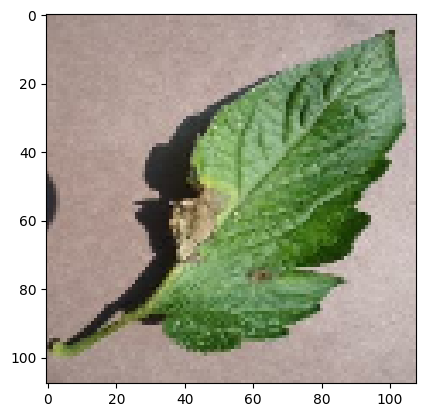

In [ ]:
plt.imshow(process_image_resnet(image_path))

In [ ]:
p1=p1.numpy().reshape(1,108,108,3)

In [ ]:
p2=p2.numpy().reshape(1,224,224,3)

In [ ]:
q=model_1.predict(p1)
r=model_2.predict(p2)
#s=model_3.predict(p3)
#t=model_4.predict(p1)

1/1 [==============================] - 1s 978ms/step


In [ ]:
# pred=(q+r)/2
pred=(q+r)/2

In [ ]:
print("predicted label:",class_names[np.argmax(pred[0])])

predicted label: Tomato___Late_blight
